In [1]:
#Basic libraries to work on data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#since we do not require the description of the movies
# we will drop the column

df = df.loc[:,:"listed_in"]

# renaming the listed_in to "Genre"
df.rename({"listed_in":"genre"},axis=1,inplace=True)

In [7]:
df.shape

#8807 --> rows
# 11 --> columns

(8807, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  genre         8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


===============================================================================================

***Handling Data***

The Raw data has several issues

1. Missing values

2. Nested values

3. Datetime format

4. Units

===============================================================================================


***<-- DATA CLEANUP Process -->***

1. MISSING VALUES

In [9]:
missing_val = df.isna().sum()
percent_missing = round((missing_val/len(df))*100,2)


missing_val_df = pd.DataFrame({"missing_val_count":missing_val,"missing_val_percentage":percent_missing})

missing_val_df

,missing_val_count,missing_val_percentage
show_id,0,0.00
type,0,0.00
title,0,0.00
director,2634,29.91
cast,825,9.37
country,831,9.44
date_added,10,0.11
release_year,0,0.00
rating,4,0.05
duration,3,0.03


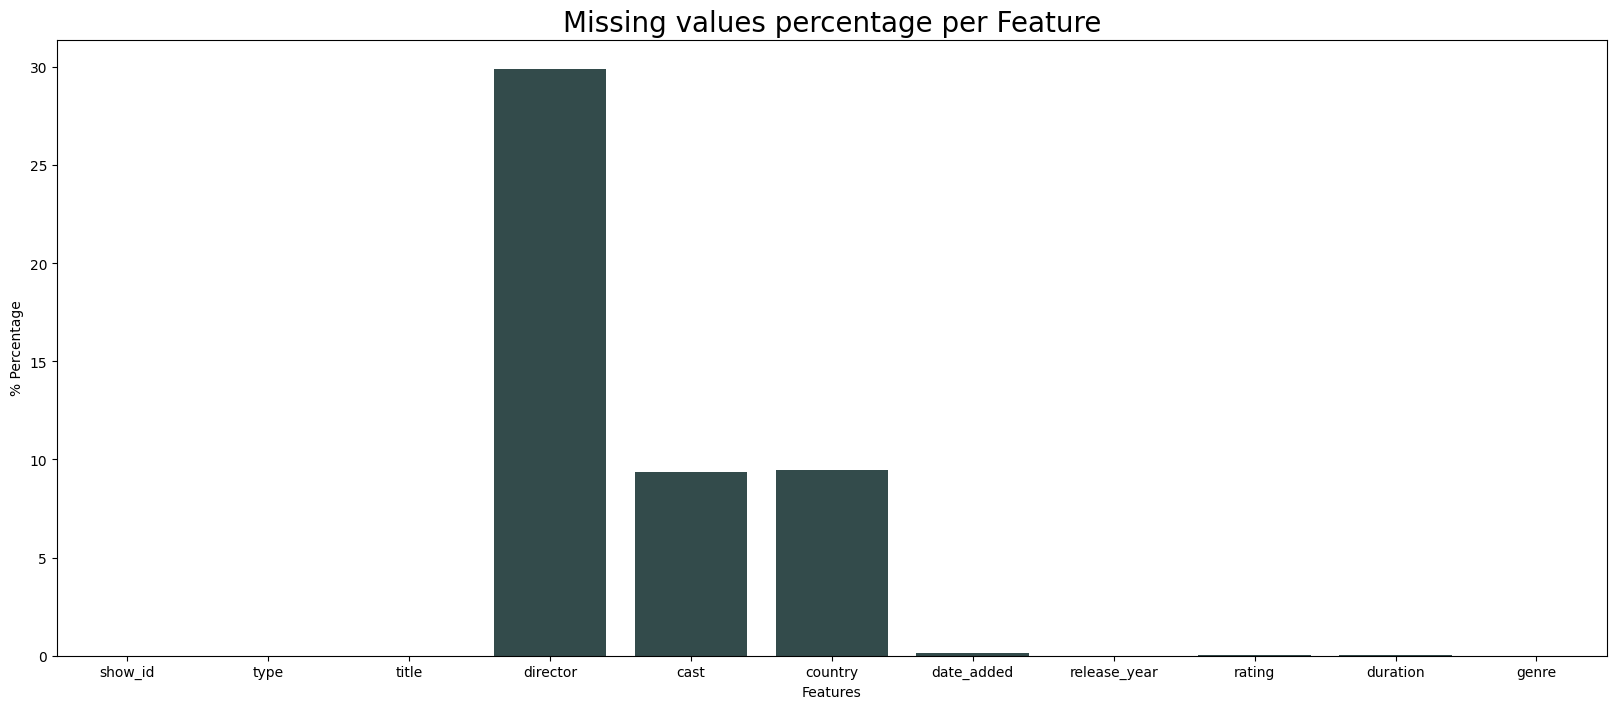

In [10]:
plt.figure(figsize=(20,8))
plt.title("Missing values percentage per Feature",fontsize=20)

plt.xlabel("Features")
plt.ylabel("% Percentage")

sns.barplot(data = missing_val_df, x = missing_val_df.index, y = "missing_val_percentage", color = "darkslategrey")

plt.show()

# **The above Figure shows the percentage of missing data for each features **

Features ->
"date_added" , "rating" , "duration"  
Has null values of less than 1%
which we can *DROP OFF*.

Features ->  
"director"  29.91%

"cast"      9.37%

"country"   9,44%

Has significant portion of missing data, Which we replace it mode.

In [11]:
nw_df = df.dropna(how ="any",subset=["duration","rating","date_added"])

nw_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [ ]:
len(df)-len(nw_df)
# 17 rows have been dropped

17

17 Rows has been dropped from the original data

In [13]:
df = nw_df

In [14]:
df["director"].isna().sum()

2621

ALL three features with Nan values are Categorical,

We can go with ,
Mode imputation or
Knn imputation , K nearest neighbour

In [15]:
# we'll fill with the mode

df['director'].fillna(df["director"].mode()[0],inplace=True)
df['cast'].fillna(df["cast"].mode()[0],inplace=True)
df['country'].fillna(df["country"].mode()[0],inplace=True)


In [16]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Successfully the data has NO NULL Values

**2. Handling Date Format**

In [17]:
#lets modify the date format
df["date_added"] = df["date_added"].str.strip() # removing white spaces


In [18]:
df["date_added"] = pd.to_datetime(df["date_added"],format = "%B %d, %Y")

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


3. Handling Units of duration

Remove the units from the duration

          
movie -->  minutes

tv_shows --> seasons

In [22]:
df["duration"] = df["duration"].str.split()

In [23]:
df["duration"] = df["duration"].apply(lambda a: a[0])
df["duration"] = df["duration"].astype(int)

In [24]:
df["release_year"] = df["release_year"].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   int64         
 10  genre         8790 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 824.1+ KB


**4. Handling Nested**

Features --> director, country , cast, genre

Contains the Nested values

In [26]:
# removing trailing spaces on the columns

columns_to_strip = ["show_id","type","title","director","cast","country","rating","genre"]

df[columns_to_strip] =df[columns_to_strip].apply(lambda x : x.str.strip() )

In [27]:
data_df = df

In [29]:
data_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."


In [30]:
dir_df = data_df[["show_id","director"]]
dir_df

,show_id,director
0,s1,Kirsten Johnson
1,s2,Rajiv Chilaka
2,s3,Julien Leclercq
3,s4,Rajiv Chilaka
4,s5,Rajiv Chilaka
...,...,...
8802,s8803,David Fincher
8803,s8804,Rajiv Chilaka
8804,s8805,Ruben Fleischer
8805,s8806,Peter Hewitt


In [32]:
dir_df['director'].value_counts()

,count
director,
Rajiv Chilaka,2640
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


In [33]:
cast_df = dir_df["director"].str.split(",",expand=True)

cast_df


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
1,Rajiv Chilaka,None,None,None,None,None,None,None,None,None,None,None,None
2,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
3,Rajiv Chilaka,None,None,None,None,None,None,None,None,None,None,None,None
4,Rajiv Chilaka,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
8803,Rajiv Chilaka,None,None,None,None,None,None,None,None,None,None,None,None
8804,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None
8805,Peter Hewitt,None,None,None,None,None,None,None,None,None,None,None,None


In [34]:
col_names = [ f"cast_{i}" for i in range(cast_df.shape[1])]
cast_df.columns = col_names

In [35]:
dir_df = pd.concat([dir_df["show_id"],cast_df],axis=1)

In [ ]:
dir_df.head(10)

,show_id,cast_0,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,cast_7,cast_8,cast_9,cast_10,cast_11,cast_12
0,s1,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
1,s2,Rajiv Chilaka,None,None,None,None,None,None,None,None,None,None,None,None
2,s3,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
3,s4,Rajiv Chilaka,None,None,None,None,None,None,None,None,None,None,None,None
4,s5,Rajiv Chilaka,None,None,None,None,None,None,None,None,None,None,None,None
5,s6,Mike Flanagan,None,None,None,None,None,None,None,None,None,None,None,None
6,s7,Robert Cullen,José Luis Ucha,None,None,None,None,None,None,None,None,None,None,None
7,s8,Haile Gerima,None,None,None,None,None,None,None,None,None,None,None,None
8,s9,Andy Devonshire,None,None,None,None,None,None,None,None,None,None,None,None
9,s10,Theodore Melfi,None,None,None,None,None,None,None,None,None,None,None,None


In [36]:
# reduce the columns to rows
# melt

dir_df = pd.melt(dir_df,id_vars=["show_id"],value_name="director")   # the coloumns to keep others melt



In [37]:
dir_df.head()

,show_id,variable,director
0,s1,cast_0,Kirsten Johnson
1,s2,cast_0,Rajiv Chilaka
2,s3,cast_0,Julien Leclercq
3,s4,cast_0,Rajiv Chilaka
4,s5,cast_0,Rajiv Chilaka


In [38]:
dir_df = dir_df.drop(columns=["variable"])
dir_df = dir_df.dropna()

dir_df = dir_df.sort_index()

dir_df

,show_id,director
0,s1,Kirsten Johnson
1,s2,Rajiv Chilaka
2,s3,Julien Leclercq
3,s4,Rajiv Chilaka
4,s5,Rajiv Chilaka
...,...,...
95401,s7516,Rusty Cundieff
102574,s5888,Mike Gabriel
103590,s6911,Hiroshi Yamazaki
104191,s7516,James Gunn


In [39]:
dir_df.head(10)


,show_id,director
0,s1,Kirsten Johnson
1,s2,Rajiv Chilaka
2,s3,Julien Leclercq
3,s4,Rajiv Chilaka
4,s5,Rajiv Chilaka
5,s6,Mike Flanagan
6,s7,Robert Cullen
7,s8,Haile Gerima
8,s9,Andy Devonshire
9,s10,Theodore Melfi


In [40]:
dir_df.shape

(9595, 2)

--------------------------------------------------------------------------

In [42]:
data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."


In [43]:
cast_df = data_df[["show_id","cast"]]

cast_df

,show_id,cast
0,s1,David Attenborough
1,s2,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,s3,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,s4,David Attenborough
4,s5,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...,...
8802,s8803,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,s8804,David Attenborough
8804,s8805,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,s8806,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [44]:
tm_df = cast_df["cast"].str.split(",",expand=True)
tm_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,David Attenborough,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
2,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
3,David Attenborough,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
8803,David Attenborough,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8804,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8805,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None


In [45]:
cast_df = pd.concat([cast_df["show_id"],tm_df],axis=1)

cast_df

,show_id,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,s1,David Attenborough,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,s2,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,...,None,None,None,None,None,None,None,None,None,None
2,s3,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,...,None,None,None,None,None,None,None,None,None,None
3,s4,David Attenborough,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,s5,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,David Attenborough,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,...,None,None,None,None,None,None,None,None,None,None


In [46]:
cast_df = pd.melt(cast_df,id_vars=["show_id"],value_name="cast").drop(columns="variable").dropna().sort_index()

cast_df

,show_id,cast
0,s1,David Attenborough
1,s2,Ama Qamata
2,s3,Sami Bouajila
3,s4,David Attenborough
4,s5,Mayur More
...,...,...
416904,s3775,Jon Hamm
423774,s1855,Ayize Ma'at
425694,s3775,Oona Chaplin
432564,s1855,Lovie Simone


===========================================================================

In [47]:
data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."


In [48]:
country_df = data_df[["show_id","country"]]

country_df.head(10)

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,United States
3,s4,United States
4,s5,India
5,s6,United States
6,s7,United States
7,s8,"United States, Ghana, Burkina Faso, United Kin..."
8,s9,United Kingdom
9,s10,United States


In [49]:
tmp_df = country_df["country"].str.split(",",expand=True)
tmp_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,United States,None,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,None,None
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,United States,None,None,None,None,None,None,None,None,None,None,None
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [50]:
country_df = pd.concat([country_df["show_id"],tmp_df],axis=1)

country_df

,show_id,0,1,2,3,4,5,6,7,8,9,10,11
0,s1,United States,None,None,None,None,None,None,None,None,None,None,None
1,s2,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,s3,United States,None,None,None,None,None,None,None,None,None,None,None
3,s4,United States,None,None,None,None,None,None,None,None,None,None,None
4,s5,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,United States,None,None,None,None,None,None,None,None,None,None,None
8803,s8804,United States,None,None,None,None,None,None,None,None,None,None,None
8804,s8805,United States,None,None,None,None,None,None,None,None,None,None,None
8805,s8806,United States,None,None,None,None,None,None,None,None,None,None,None


In [51]:
country_df = pd.melt(country_df,id_vars=["show_id"],value_name="country").drop(columns=["variable"]).dropna(axis=0).sort_index()

In [52]:
country_df

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,United States
3,s4,United States
4,s5,India
...,...,...
78706,s8404,Germany
85337,s6234,Sweden
87496,s8404,Netherlands
94127,s6234,United States


In [53]:
data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."


In [54]:
genre_df = data_df[["show_id","genre"]]

genre_df

,show_id,genre
0,s1,Documentaries
1,s2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,"Docuseries, Reality TV"
4,s5,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,s8803,"Cult Movies, Dramas, Thrillers"
8803,s8804,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,"Comedies, Horror Movies"
8805,s8806,"Children & Family Movies, Comedies"


In [55]:
tmp_df = genre_df["genre"].str.split(",",expand=True)
tmp_df

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [56]:
genre_df = pd.concat([genre_df["show_id"],tmp_df],axis=1)
genre_df

,show_id,0,1,2
0,s1,Documentaries,None,None
1,s2,International TV Shows,TV Dramas,TV Mysteries
2,s3,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,Docuseries,Reality TV,None
4,s5,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...
8802,s8803,Cult Movies,Dramas,Thrillers
8803,s8804,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Comedies,Horror Movies,None
8805,s8806,Children & Family Movies,Comedies,None


In [57]:
genre_df = pd.melt(genre_df,id_vars=["show_id"],value_name="genre").drop(columns="variable").dropna().sort_index()


In [59]:
genre_df

,show_id,genre
0,s1,Documentaries
1,s2,International TV Shows
2,s3,Crime TV Shows
3,s4,Docuseries
4,s5,International TV Shows
...,...,...
26363,s8801,TV Dramas
26364,s8802,Thrillers
26365,s8803,Thrillers
26366,s8804,TV Comedies


**Merging all the individual DataFrame's**

In [60]:
first_merge = dir_df.merge(cast_df,on="show_id",how="inner")

first_merge

,show_id,director,cast
0,s1,Kirsten Johnson,David Attenborough
1,s2,Rajiv Chilaka,Ama Qamata
2,s2,Rajiv Chilaka,Khosi Ngema
3,s2,Rajiv Chilaka,Gail Mabalane
4,s2,Rajiv Chilaka,Thabang Molaba
...,...,...,...
70697,s8807,Mozez Singh,Manish Chaudhary
70698,s8807,Mozez Singh,Meghna Malik
70699,s8807,Mozez Singh,Malkeet Rauni
70700,s8807,Mozez Singh,Anita Shabdish


In [61]:
second_merge = first_merge.merge(country_df,on="show_id",how="inner")

second_merge

,show_id,director,cast,country
0,s1,Kirsten Johnson,David Attenborough,United States
1,s2,Rajiv Chilaka,Ama Qamata,South Africa
2,s2,Rajiv Chilaka,Khosi Ngema,South Africa
3,s2,Rajiv Chilaka,Gail Mabalane,South Africa
4,s2,Rajiv Chilaka,Thabang Molaba,South Africa
...,...,...,...,...
89300,s8807,Mozez Singh,Manish Chaudhary,India
89301,s8807,Mozez Singh,Meghna Malik,India
89302,s8807,Mozez Singh,Malkeet Rauni,India
89303,s8807,Mozez Singh,Anita Shabdish,India


In [62]:
fin_merge_df = second_merge.merge(genre_df,on="show_id",how="inner")

fin_merge_df.head()

,show_id,director,cast,country,genre
0,s1,Kirsten Johnson,David Attenborough,United States,Documentaries
1,s2,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows
2,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas
3,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries
4,s2,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows


In [63]:
orig_df = data_df[["show_id","type","title","date_added","release_year","rating","duration"]]

orig_df

,show_id,type,title,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2
...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2019-11-20,2007,R,158
8803,s8804,TV Show,Zombie Dumb,2019-07-01,2018,TV-Y7,2
8804,s8805,Movie,Zombieland,2019-11-01,2009,R,88
8805,s8806,Movie,Zoom,2020-01-11,2006,PG,88


In [64]:
processed_data = fin_merge_df.merge(orig_df,on="show_id",how="inner")

**PROCESSED DATA SET**

DONE WITH DATA CLEANING

In [65]:
processed_data.head(10)

,show_id,director,cast,country,genre,type,title,date_added,release_year,rating,duration
0,s1,Kirsten Johnson,David Attenborough,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90
1,s2,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
2,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
3,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
4,s2,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
5,s2,Rajiv Chilaka,Khosi Ngema,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
6,s2,Rajiv Chilaka,Khosi Ngema,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
7,s2,Rajiv Chilaka,Gail Mabalane,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
8,s2,Rajiv Chilaka,Gail Mabalane,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
9,s2,Rajiv Chilaka,Gail Mabalane,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2


In [66]:
processed_data.to_csv("processed_netflix_data.csv",index=False)

In [ ]:
df2 = pd.read_csv("processed_netflix_data.csv")

df2.head()

,show_id,director,cast,country,genre,type,title,date_added,release_year,rating,duration
0,s1,Kirsten Johnson,David Attenborough,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90
1,s2,Rajiv Chilaka,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
2,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
3,s2,Rajiv Chilaka,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2
4,s2,Rajiv Chilaka,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201837 entries, 0 to 201836
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201837 non-null  object
 1   director      201837 non-null  object
 2   cast          201837 non-null  object
 3   country       201731 non-null  object
 4   genre         201837 non-null  object
 5   type          201837 non-null  object
 6   title         201837 non-null  object
 7   date_added    201837 non-null  object
 8   release_year  201837 non-null  int64 
 9   rating        201837 non-null  object
 10  duration      201837 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 16.9+ MB
